<a href="https://colab.research.google.com/github/SriKrishnaMishra/Text-to-Image-Generation/blob/main/Text_to_3rd_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to: Efficient Text-to-Image Generation

> Add blockquote



In [1]:
pip install -U diffusers accelerate transformers -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.8 MB/s eta 0:00:00


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

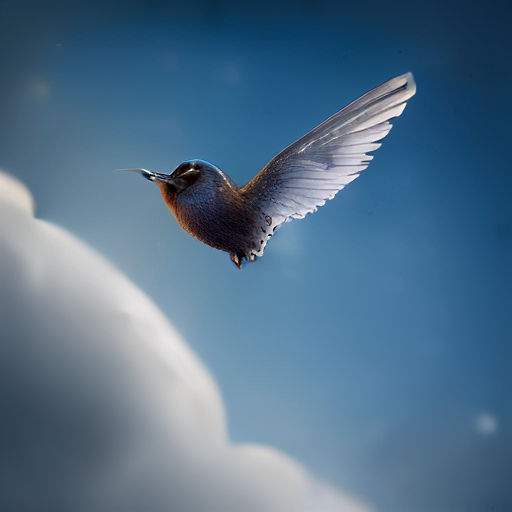

In [6]:
import torch
from diffusers import AmusedPipeline

pipe = AmusedPipeline.from_pretrained(
    "amused/amused-512", variant="fp16", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

# any one can change the prompt in his own away
prompt = "A Bird fly into sky "

# the quality of the image is decided

negative_prompt = "low quality, ugly"

image = pipe(prompt, negative_prompt=negative_prompt, generator=torch.manual_seed(0)).images[0]
image


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

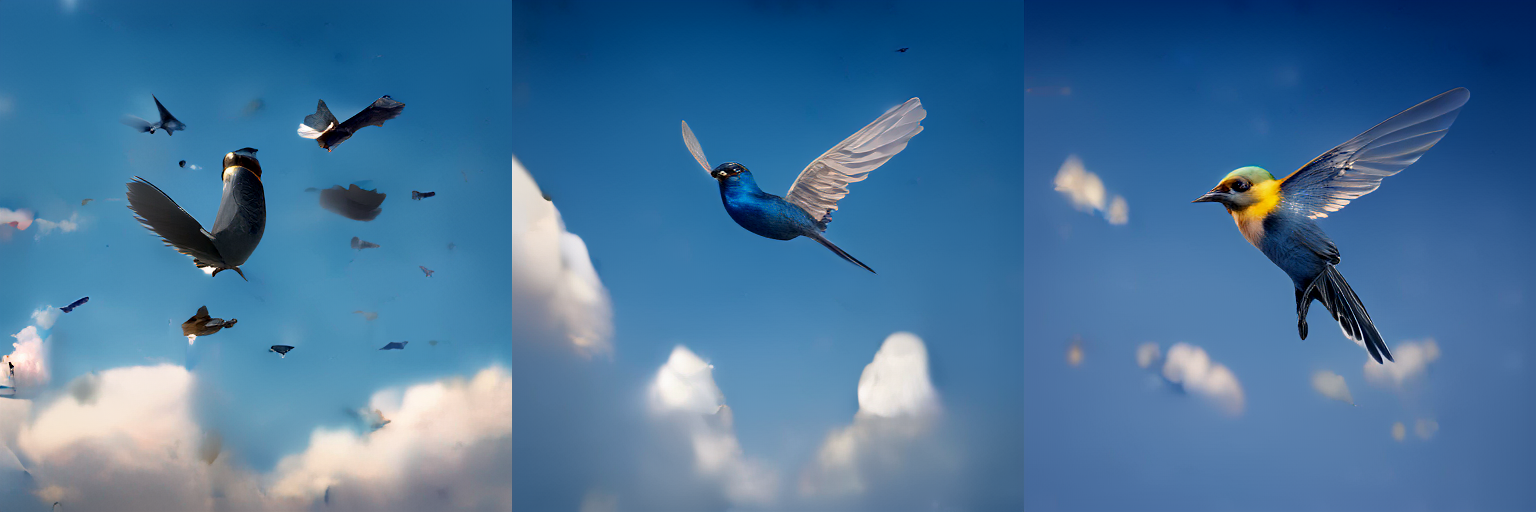

In [7]:
from diffusers.utils import make_image_grid

images = []
for step in [5, 10, 15]:
    image = pipe(prompt, negative_prompt=negative_prompt, num_inference_steps=step, generator=torch.manual_seed(0)).images[0]
    images.append(image)

grid = make_image_grid(images, rows=1, cols=3)
grid


In [5]:
import torch
import os
from diffusers import AmusedInpaintPipeline
from diffusers.utils import load_image
from PIL import Image

# Check if CUDA is available
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
    print(f"CUDA not available, using {device} instead")

# Load the pipeline
pipe = AmusedInpaintPipeline.from_pretrained(
    "amused/amused-512",
    variant="fp16",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)

# Input preparation
prompt = "a man with glasses"

# Load and prepare input image
input_image_url = "https://huggingface.co/amused/amused-512/resolve/main/assets/inpainting_256_orig.png"
input_image = load_image(input_image_url).resize((512, 512)).convert("RGB")

# Load and prepare mask image
mask_url = "https://huggingface.co/amused/amused-512/resolve/main/assets/inpainting_256_mask.png"
mask = load_image(mask_url).resize((512, 512)).convert("L")

# Set a fixed seed for reproducibility
generator = torch.manual_seed(3)

# Generate the inpainted image
output = pipe(
    prompt=prompt,
    image=input_image,
    mask_image=mask,
    generator=generator,
    num_inference_steps=50  # Default is usually 50
)

# Access the generated image
image = output.images[0]

# Print current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Define file path with absolute path
file_path = os.path.join(current_dir, "inpainted_image.png")

try:
    # Save the result
    image.save(file_path)
    print(f"Image saved successfully at: {file_path}")

    # Verify the file exists
    if os.path.exists(file_path):
        print(f"File verification: Image exists at {file_path}")
        print(f"File size: {os.path.getsize(file_path)} bytes")
    else:
        print(f"File verification failed: Image not found at {file_path}")

except Exception as e:
    print(f"Error saving image: {e}")

print("Process completed!")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Current working directory: /content
Image saved successfully at: /content/inpainted_image.png
File verification: Image exists at /content/inpainted_image.png
File size: 261815 bytes
Process completed!
